In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
from tqdm import tqdm
import seaborn as sns

# Data Preprocessing

In [3]:
df = pd.read_csv('data/attribution data.csv')
df

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search
...,...,...,...,...,...,...
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display
586733,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:54Z,impression,0,0.0,Online Display
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            586737 non-null  object 
 1   time              586737 non-null  object 
 2   interaction       586737 non-null  object 
 3   conversion        586737 non-null  int64  
 4   conversion_value  586737 non-null  float64
 5   channel           586737 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ MB


In [5]:
print('고객수 :', len(df.cookie.unique()))
print('전환여부 :', df.interaction.unique())
print('전환변수 :', df.conversion.unique())
print('전환가치 :', df.conversion_value.unique())
print('채널 수 :', len(df.channel.unique()))
print('채널 종류 :', df.channel.unique())


고객수 : 240108
전환여부 : ['impression' 'conversion']
전환변수 : [0 1]
전환가치 : [0.  6.5 8.  6.  7.5 7.  5.  4.5 5.5 8.5 4. ]
채널 수 : 5
채널 종류 : ['Instagram' 'Online Display' 'Paid Search' 'Facebook' 'Online Video']


In [6]:
len(df[df.conversion==1])

17639

In [7]:
df = df.sort_values(['cookie', 'time'], ascending=[False, True])
df['visit_order'] = df.groupby('cookie').cumcount()+1 # 그룹내 번호 매기기(순서 지정)
df

,cookie,time,interaction,conversion,conversion_value,channel,visit_order
586736,ooooohAFofEnonEikhAi3fF9o,2018-07-14T17:17:12Z,impression,0,0.0,Paid Search,1
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search,1
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video,2
586731,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06T23:30:38Z,impression,0,0.0,Online Display,1
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display,2
...,...,...,...,...,...,...,...
9,0000nACkD9nFkBBDECD3ki00E,2018-07-11T22:19:53Z,impression,0,0.0,Paid Search,6
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram,1
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display,2
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display,3


In [8]:
df_paths = df.groupby('cookie')['channel'].aggregate(
            lambda x : x.unique().tolist()).reset_index()
df_paths.head(3)

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]"
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search]
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search]


In [9]:
# 각 cookie별 마지막 접근 확인
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'conversion']]
df_last_interaction.head(3)

,cookie,conversion
586736,ooooohAFofEnonEikhAi3fF9o,0
586735,ooooiBh70D3k3BfAhDFfii9h7,0
586733,ooooEiB0CCoEf9fiiC90Dfhfk,0


In [10]:
df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='cookie')
df_paths.head(3)

,cookie,channel,conversion
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]",0
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search],0
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search],0


In [11]:
df_paths['path'] = np.nan
df_paths.path = df_paths.path.astype('object')

for data in tqdm(df_paths.itertuples()):

    if data.conversion == 0:
        df_paths.at[data.Index, 'path'] = ['Start']+data.channel+['Null']
        
    else:
        df_paths.at[data.Index, 'path'] = ['Start']+data.channel+['Conversion']
        
#     break

240108it [00:02, 90116.49it/s] 


In [12]:
df_paths

,cookie,channel,conversion,path
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]",0,"[Start, Instagram, Online Display, Null]"
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search],0,"[Start, Paid Search, Null]"
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search],0,"[Start, Paid Search, Null]"
3,00073CFE3FoFCn70fBhB3kfon,[Instagram],0,"[Start, Instagram, Null]"
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search],0,"[Start, Paid Search, Null]"
...,...,...,...,...
240103,ooooE0hkAFBkED90ChDDiBFAf,[Online Display],0,"[Start, Online Display, Null]"
240104,ooooEBE0o0D97ACAAAnDoi3F0,[Online Display],0,"[Start, Online Display, Null]"
240105,ooooEiB0CCoEf9fiiC90Dfhfk,[Online Display],0,"[Start, Online Display, Null]"
240106,ooooiBh70D3k3BfAhDFfii9h7,"[Paid Search, Online Video]",0,"[Start, Paid Search, Online Video, Null]"


In [13]:
df_paths = df_paths[['cookie', 'path']]
df_paths.head(3)

,cookie,path
0,00000FkCnDfDDf0iC97iC703B,"[Start, Instagram, Online Display, Null]"
1,0000nACkD9nFkBBDECD3ki00E,"[Start, Paid Search, Null]"
2,0003EfE37E93D0BC03iBhBBhF,"[Start, Paid Search, Null]"


In [14]:
list_of_paths = df_paths['path']  # path를 리스트로 
total_conversions = sum(path.count('Conversion') for path in df_paths['path'].to_list())  # Conversion 개수
base_conversion_rate = total_conversions / len(list_of_paths)   # 전체 유저 중 거래체결(Conversion)한 유저의 비율

In [15]:
base_conversion_rate

0.07346277508454528

In [16]:
list_of_paths

0         [Start, Instagram, Online Display, Null]
1                       [Start, Paid Search, Null]
2                       [Start, Paid Search, Null]
3                         [Start, Instagram, Null]
4                       [Start, Paid Search, Null]
                            ...                   
240103               [Start, Online Display, Null]
240104               [Start, Online Display, Null]
240105               [Start, Online Display, Null]
240106    [Start, Paid Search, Online Video, Null]
240107                  [Start, Paid Search, Null]
Name: path, Length: 240108, dtype: object

In [17]:
def transition_states(list_of_paths):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)  # channel 종류
    transition_states = { x + '>' + y : 0 for x in list_of_unique_channels for y in list_of_unique_channels}  # channel1 > channel2(one step) root 경우 dict 만들기
                                                                                                              #      예시)   {'Online Video>Online Video': 0,
                                                                                                              #             'Online Video>Null': 0, ...}

    for possible_state in list_of_unique_channels:                                         # 채널별로(ch) 
        if possible_state not in ['Conversion', 'Null']:                                   # 채널이 Conversion, Null이 아닐때

            for user_path in list_of_paths:                                                  # user개인의 path를 봐서 
                if possible_state in user_path:                                              # user의 path에 해당 채널(ch)이 들어있다면
                    indices = [i for i, s in enumerate(user_path) if possible_state in s]      # 해당 채널(ch)의 index(순서) 확인

                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col+1]] += 1        # 해당 채널(ch)에서 다음 채널로 이동하는 경로 카운팅 추가

    return transition_states    # 경로별 경우의 수를 dict로 return
    

In [18]:
trans_states = transition_states(list_of_paths)
trans_states

{'Online Video>Online Video': 0,
 'Online Video>Paid Search': 1964,
 'Online Video>Conversion': 3201,
 'Online Video>Null': 31285,
 'Online Video>Online Display': 775,
 'Online Video>Facebook': 2430,
 'Online Video>Start': 0,
 'Online Video>Instagram': 1307,
 'Paid Search>Online Video': 2596,
 'Paid Search>Paid Search': 0,
 'Paid Search>Conversion': 4736,
 'Paid Search>Null': 68476,
 'Paid Search>Online Display': 4269,
 'Paid Search>Facebook': 5725,
 'Paid Search>Start': 0,
 'Paid Search>Instagram': 3038,
 'Conversion>Online Video': 0,
 'Conversion>Paid Search': 0,
 'Conversion>Conversion': 0,
 'Conversion>Null': 0,
 'Conversion>Online Display': 0,
 'Conversion>Facebook': 0,
 'Conversion>Start': 0,
 'Conversion>Instagram': 0,
 'Null>Online Video': 0,
 'Null>Paid Search': 0,
 'Null>Conversion': 0,
 'Null>Null': 0,
 'Null>Online Display': 0,
 'Null>Facebook': 0,
 'Null>Start': 0,
 'Null>Instagram': 0,
 'Online Display>Online Video': 737,
 'Online Display>Paid Search': 3936,
 'Online Disp

In [19]:
list_of_unique_channels = set(x for element in list_of_paths for x in element)
list_of_unique_channels

{'Conversion',
 'Facebook',
 'Instagram',
 'Null',
 'Online Display',
 'Online Video',
 'Paid Search',
 'Start'}

In [20]:
# 전환 확률을 계산하는 함수 정의
def transition_prob(trans_dict):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)   # 채널 종류
    trans_prob = defaultdict(dict)     # defaultdict(dict) = defaultdict(dict, {})
    
    for state in list_of_unique_channels:                                                    # 채널 별로 
        if state not in ['Conversion', 'Null']:                                              # 채널이 Conversion, Null 이 아닐때
            counter = 0                                                                       
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]                # 해당 채널에서 전환된 경우에 대한 trans_dict에서의 index
            
            for col in index:                                                                  # 해당채널 전환 경우들에 대해 
                if trans_dict[list(trans_dict)[col]] > 0:                                      # 해당 채널에서 전환된 경우의 수가 0보다 클 경우
                    counter += trans_dict[list(trans_dict)[col]]                               # count 더하기
            
            for col in index :                                                                 # 해당 채널 전환 경우들에 대해 
                if trans_dict[list(trans_dict)[col]] > 0 :                                     # 해당 채널에서 전환된 경우의 수가 0보다 클 경우
                    state_prob = float((trans_dict[list(trans_dict)[col]])) / float(counter)   # 확률 계산( 특정 전환 경우 / 해당 채널로 부터 전환된 모든 경우  )
                    trans_prob[list(trans_dict)[col]] = state_prob                             # 확률을 trans_prob dict에 저장(key name = 특정 전환 상황)

    return trans_prob    # 전환 확률 사전 return

In [21]:
trans_prob = transition_prob(trans_states)
trans_prob

defaultdict(dict,
            {'Online Video>Paid Search': 0.04794687759386749,
             'Online Video>Conversion': 0.0781455983594551,
             'Online Video>Null': 0.7637566525072018,
             'Online Video>Online Display': 0.018919974610614718,
             'Online Video>Facebook': 0.059323275230701626,
             'Online Video>Instagram': 0.03190762169815927,
             'Paid Search>Online Video': 0.029221071589374155,
             'Paid Search>Conversion': 0.053309320126069336,
             'Paid Search>Null': 0.7707789284106259,
             'Paid Search>Online Display': 0.04805267897343539,
             'Paid Search>Facebook': 0.06444169293111211,
             'Paid Search>Instagram': 0.03419630796938316,
             'Online Display>Online Video': 0.017298845178856444,
             'Online Display>Paid Search': 0.09238569148436766,
             'Online Display>Conversion': 0.05032391324758239,
             'Online Display>Null': 0.7566425687728852,
             

In [22]:
list_of_paths

0         [Start, Instagram, Online Display, Null]
1                       [Start, Paid Search, Null]
2                       [Start, Paid Search, Null]
3                         [Start, Instagram, Null]
4                       [Start, Paid Search, Null]
                            ...                   
240103               [Start, Online Display, Null]
240104               [Start, Online Display, Null]
240105               [Start, Online Display, Null]
240106    [Start, Paid Search, Online Video, Null]
240107                  [Start, Paid Search, Null]
Name: path, Length: 240108, dtype: object

In [23]:
def transition_matrix(list_of_paths, transition_probabilities):
    
    
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in list_of_paths for x in element)    # 채널 종류

    for channel in list_of_unique_channels:      # 채널별로 
        trans_matrix[channel] = 0.00             # 데이터프레임 생성 
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['Conversion', 'Null'] else 0.0 

    for key, value in transition_probabilities.items():     # 전환확률 dict     
        origin, destination = key.split('>')                # 1차 채널, 2차 채널로 분류
        trans_matrix.at[origin, destination] = value        # 두 채널을 row, col로 하는 위치에 확률입력

    return trans_matrix    # 확률 DF return

In [24]:
trans_matrix = transition_matrix(list_of_paths, trans_prob)
trans_matrix

,Online Video,Paid Search,Conversion,Null,Online Display,Facebook,Start,Instagram
Online Video,0.000000,0.047947,0.078146,0.763757,0.018920,0.059323,0.0,0.031908
Paid Search,0.029221,0.000000,0.053309,0.770779,0.048053,0.064442,0.0,0.034196
Conversion,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
Null,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
Online Display,0.017299,0.092386,0.050324,0.756643,0.000000,0.053986,0.0,0.029363
Facebook,0.025577,0.050655,0.053220,0.673123,0.024352,0.000000,0.0,0.173072
Start,0.142361,0.317399,0.000000,0.000000,0.142644,0.278408,0.0,0.119188
Instagram,0.024118,0.045809,0.057979,0.629786,0.023531,0.218777,0.0,0.000000


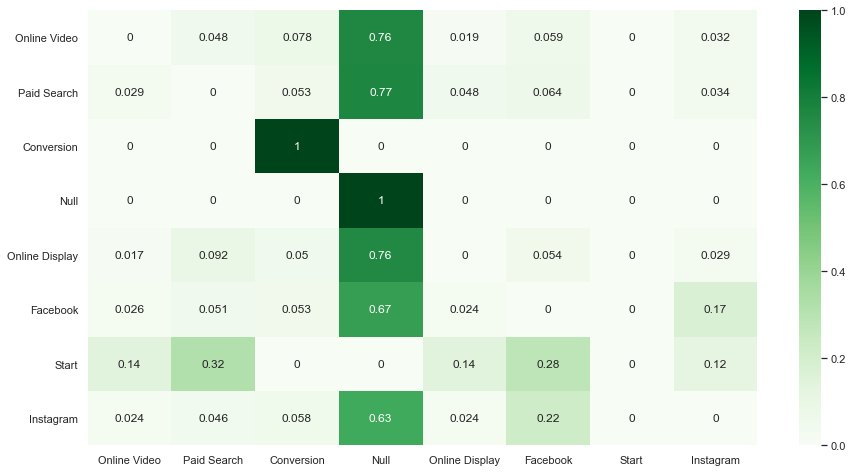

In [25]:
# 히트맵 그리기
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(trans_matrix, annot=True, cmap='Greens');

In [43]:
def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['Start',
                                                                     'Null',
                                                                     'Conversion']]
    
    for channel in channels:                                                      # 채널별로
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)               # 해당 채널 row, col을 지운 DF 추출(removal_df)
        
        for column in removal_df.columns:                                           # removal_df의 컬럼별로(해당 채널을 제외한 채널)
            row_sum = np.sum(list(removal_df.loc[column]))                          # 채널별 확률의 합
            null_pct = float(1) - row_sum                                           # 1-채널별 확률합(null_pct)
            if null_pct != 0:                                                       # null_pct 가 0 이 아니면
                removal_df.loc[column]['Null'] = null_pct                            # removal_df(채널, Null) 위치에 null_pct 입력
            removal_df.loc['Null']['Null'] = 1.0                                     # removal_df(Null, Null) 1.0 입력

            
            
        removal_to_conv = removal_df[                                             # removal_df에서 Null, Conversion 컬럼만 추출한 DF중 
            ['Null', 'Conversion']].drop(['Null', 'Conversion'], axis=0)            # (Null, :), (Conversion, :) 삭제(행)

        removal_to_non_conv = removal_df.drop(                                    # removal_df에서 Null, Conversion 컬럼을 제외한 DF 중 
            ['Null', 'Conversion'], axis=1).drop(['Null', 'Conversion'], axis=0)    # (Null, :), (Conversion, :) 삭제(행)

        removal_inv_diff = np.linalg.inv(                                                      # 역행렬(np.linalg.inv)
            np.identity(len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv)    # 5x5 대각행렬(identity) - removal_to_non_conv 배열   
        )
        
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))    # 행렬연산(np.dot)
        
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['Start'].values[0] # 행렬연산 결과DF 중 'Start' 행의 col-1
        
        removal_effect = 1 - removal_cvr / conversion_rate        # 1 - removal_cvr/거래체결유저비율
        removal_effects_dict[channel] = removal_effect            # removal_effects_dict에 입력 

    return removal_effects_dict   # removal_effects_dict return

In [44]:
removal_effects_dict = removal_effects(trans_matrix, base_conversion_rate)    # base_conversion_rate : 거래체결유저비율
removal_effects_dict

{'Online Video': 0.2069141165564219,
 'Paid Search': 0.3311037560086154,
 'Online Display': 0.15435482356041286,
 'Facebook': 0.3547597674182722,
 'Instagram': 0.21731366149038456}

In [48]:
def markov_chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))        # removal_effects 값들의 합

    return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}    
           # ( 해당 채널의 removal_effects / re_sum )*거래체결유저비율

In [49]:
attributions = markov_chain_allocations(removal_effects_dict, total_conversions)
attributions

{'Online Video': 2886.448089546146,
 'Paid Search': 4618.891257291354,
 'Online Display': 2153.246926759083,
 'Facebook': 4948.892177847523,
 'Instagram': 3031.521548555892}

In [59]:
attributions_df = pd.DataFrame(list(attributions.items()), columns=['Channels', 'Conversions'])
attributions_df

,Channels,Conversions
0,Online Video,2886.448090
1,Paid Search,4618.891257
2,Online Display,2153.246927
3,Facebook,4948.892178
4,Instagram,3031.521549


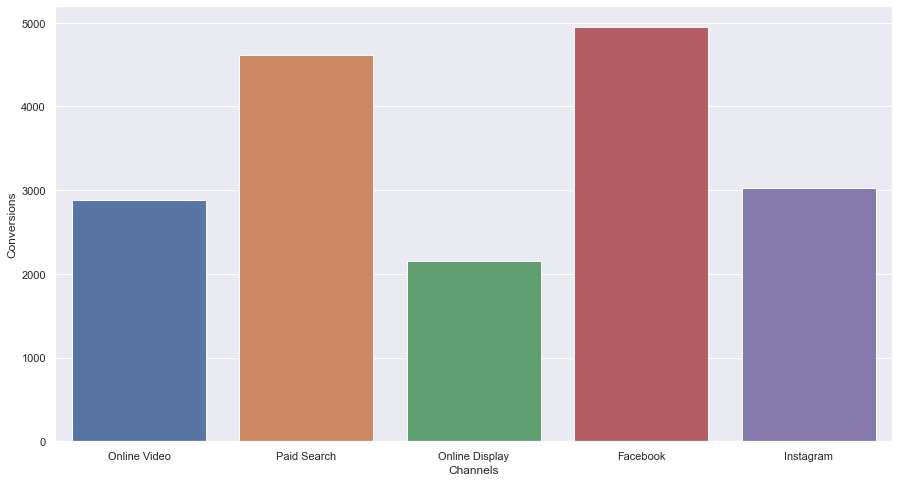

In [66]:
sns.barplot(x='Channels', y='Conversions', data=attributions_df);